<a href="https://colab.research.google.com/github/ymuto0302/base1_2022/blob/main/economicdata2_nyse_nasdaq_stock_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 経済データの分析(3)：米国株の分析
ニューヨーク証券取引所(NYSE)および NASDAQ に上場された株式の相関を調べる。

# Analysis of Economic Data(3) : Analyzing U.S. Stock Prices
Examine the correlations for stocks listed on the New York Stock Exchange (NYSE) and NASDAQ.

## 大まかな手順
1. 分析対象企業群の stock code (ticker symbol) を調べる。
1. yfinance モジュールを用いて，分析対象企業群の株価データを取得する。
1. 株価の変動パーセント (percentage change) を求め，それらの相関を算出する。
1. 相関係数からヒートマップを生成する。
1. 他社との相関が小さい企業の特性を調べる。

(注) 以前は pandas_datareader にて data_source に "yahoo" を指定すれば，米国版 Yahoo! Finance からデータ取得できたが，最近はうまくいかなくなっている。そのため，yfinance モジュールを利用する。

## Outline of the general procedure
1. Check the stock codes (ticker symbols) of the group of companies to by analyzed.
1. Obtain the stock price data of the companies to by analyzed using the yfinance module.
1. Obtain the percentage change of stock prices and calculate their correlations.
1. Generate a heatmap from the correlation coefficients.
Examine the characteristics of companies with small correlations with other companies.

(Note) In the past, data could be obtained from the U.S. version of Yahoo! Finance by specifying "yahoo" as the data_source in pandas_datareader. However, this does not work these days. Therefore, we use the yfinance module.

### yfinance モジュール (yfinance module)：  
https://pypi.org/project/yfinance/

なお，yfinance モジュールの利用に関して，上記のページにて次のように警告されている。故に，商用利用しないよう，注意してほしい。

yfinance is not affiliated, endorsed, or vetted by Yahoo, Inc. It's an open-source tool that uses Yahoo's publicly available APIs, and **is intended for research and educational purposes**.

The following warning is given on the above page regarding the use of the yfinance module. Therefore, please be careful not to use it for commercial purposes.

yfinance is not affiliated, endorsed, or vetted by Yahoo, Inc. It's an open-source tool that uses Yahoo's publicly available APIs, and **is intended for research and educational purposes**.


---
## (準備) yfinance モジュールのインストール
## (Preparation) Installation of yfinance module

In [ ]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 46.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


---
## 航空会社の株価の相関／ヒートマップ／株価変動
## Correlation / heat map / stock price fluctuations of airline stock prices

NYSE または NASDAQ へ上場している航空会社のリストを以下に示す。

The following is a list of airlines listed on NYSE or NASDAQ.

|ticker symbol|銘柄(英語)|銘柄(日本語)|
|:--|:--|:--|
|AAL|American Airlines Group|アメリカン航空|
|ATSG|Air Transport Services Group Inc|エア トランスポート サービシズ グループ|
|CPA|Copa Holdings A|コパ ホールディングス A|
|DAL|Delta Air Lines|デルタ エアー ラインズ|
|HA|Hawaiian|ハワイアン|
|JBLU|JetBlue Airways|ジェットブルー エアウェイズ|
|LUV|Southwest Airlines|サウスウエスト エアラインズ|
|SAVE|Spirit Airlines|エコスター A スピリット航空|
|ULCC|Frontier Group Holdings Inc|フロンティア グループ|
|UP|Wheels Up Experience Inc|ウィールズアップ|



In [ ]:
# 必要なモジュールのインポート (import of required modules)
from datetime import datetime
import yfinance as yf # yfinance モジュールのインポート (import of yfinance module)

In [ ]:
# 航空会社の stock code (ticker symbol) (aireline stock code (ticker symbol))
stock_codes = ["AAL", "ATSG", "CPA", "DAL", "HA", "JBLU", "LUV", "SAVE", "ULCC", "UP"]

# データ収集期間の定義 (definition of data collection period)
start = datetime(2021, 1, 1)
end = datetime(2021, 12, 31)

# Yahoo! Finance's API を利用したデータ・ダウンロード
# Download data using Yahoo! Finance's API
df = yf.download(stock_codes, start=start, end=end)["Adj Close"]

[*********************100%***********************]  10 of 10 completed


In [ ]:
# データの先頭を表示 (display the beginning of data)
df.head()

,AAL,ATSG,CPA,DAL,HA,JBLU,LUV,SAVE,ULCC,UP
Date,,,,,,,,,,
2021-01-04,15.13,30.940001,72.820000,38.730000,17.020000,14.03,45.040001,23.059999,NaN,10.080
2021-01-05,15.43,30.139999,76.500000,39.549999,18.020000,14.29,45.639999,23.840000,NaN,10.105
2021-01-06,15.52,29.440001,78.019997,40.380001,19.629999,14.57,46.750000,24.299999,NaN,10.070
2021-01-07,15.38,28.840000,78.110001,40.230000,19.230000,14.51,47.330002,24.469999,NaN,10.135
2021-01-08,15.13,28.170000,77.889999,40.020000,19.639999,14.69,46.980000,24.450001,NaN,10.180


"ULCC" に関して，データの存在しない期間があるため，これを分析対象から外す。  
For "ULCC", there is a period of time for which no data exists. Terefore, it is excluded from the analysis.

In [ ]:
df = df.dropna(axis=1)
df.head()

,AAL,ATSG,CPA,DAL,HA,JBLU,LUV,SAVE,UP
Date,,,,,,,,,
2021-01-04,15.13,30.940001,72.820000,38.730000,17.020000,14.03,45.040001,23.059999,10.080
2021-01-05,15.43,30.139999,76.500000,39.549999,18.020000,14.29,45.639999,23.840000,10.105
2021-01-06,15.52,29.440001,78.019997,40.380001,19.629999,14.57,46.750000,24.299999,10.070
2021-01-07,15.38,28.840000,78.110001,40.230000,19.230000,14.51,47.330002,24.469999,10.135
2021-01-08,15.13,28.170000,77.889999,40.020000,19.639999,14.69,46.980000,24.450001,10.180


変動パーセントとは，前日の株価からの変動率である。  
The "percentage change" is the percentage change from the previous day's stock price.

In [ ]:
# 変動パーセントの算出 (calculation of percentage change)
df_ratio = df.pct_change()
df_ratio.head()

,AAL,ATSG,CPA,DAL,HA,JBLU,LUV,SAVE,UP
Date,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.019828,-0.025857,0.050536,0.021172,0.058754,0.018532,0.013321,0.033825,0.002480
2021-01-06,0.005833,-0.023225,0.019869,0.020986,0.089345,0.019594,0.024321,0.019295,-0.003464
2021-01-07,-0.009021,-0.020380,0.001154,-0.003715,-0.020377,-0.004118,0.012406,0.006996,0.006455
2021-01-08,-0.016255,-0.023232,-0.002817,-0.005220,0.021321,0.012405,-0.007395,-0.000817,0.004440


相関を求めるには `corr()` メソッドを用いればよい。  
The `corr()` method can be used to find the correlation.

In [ ]:
# 変動パーセントに関する相関 (Correlations for percentage change)
corr = df_ratio.corr()
corr

,AAL,ATSG,CPA,DAL,HA,JBLU,LUV,SAVE,UP
AAL,1.000000,0.286258,0.652899,0.848326,0.713590,0.782275,0.712195,0.728964,0.168049
ATSG,0.286258,1.000000,0.262892,0.355090,0.289882,0.322231,0.330361,0.265972,0.022607
CPA,0.652899,0.262892,1.000000,0.696123,0.590115,0.646533,0.622341,0.669804,0.122796
DAL,0.848326,0.355090,0.696123,1.000000,0.783262,0.845135,0.855187,0.791451,0.214709
HA,0.713590,0.289882,0.590115,0.783262,1.000000,0.771934,0.729302,0.732456,0.167140
JBLU,0.782275,0.322231,0.646533,0.845135,0.771934,1.000000,0.837574,0.824835,0.211625
LUV,0.712195,0.330361,0.622341,0.855187,0.729302,0.837574,1.000000,0.754739,0.242173
SAVE,0.728964,0.265972,0.669804,0.791451,0.732456,0.824835,0.754739,1.000000,0.176878
UP,0.168049,0.022607,0.122796,0.214709,0.167140,0.211625,0.242173,0.176878,1.000000


上記のように，相関係数が表形式で得られる。しかし，企業数が多いため，結果の解釈が困難である。そこで，ヒートマップを用いて可視化する。

ヒートマップの生成に利用可能なモジュールは複数，考えられる。以下に代表的なモジュールを列挙する。

As shown above, the correlation coefficients are obtained in tabular form. However, due to the large number of companies, it is difficult to interpret the results. Therefore, a heatmap is used to visualize the results.

There are several possible modules that can be used to generate heatmap. The following is a list of representative modules.

- matplotlib
- seaborn (matplotlib に対する wrapper / wrapper for matplotlib)
- plotly express

今回は，シンプルなコードで記述可能な seaborn を用いる。

This content uses seaborn, which can be written in simple code.

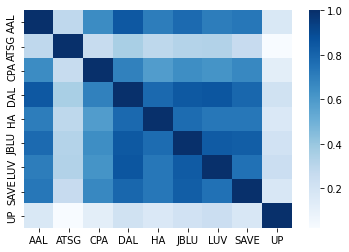

In [ ]:
# seaborn を用いたヒートマップの生成 (Generating heatmap using seaborn)
import seaborn as sns
import matplotlib.pyplot as plt
# plt.figure(figsize=(10,10)) # 図のサイズを調整したい場合，この行を有効にする
sns.heatmap(corr, cmap='Blues')

ATSG (Air Transport Services Group Inc) と UP (Wheels Up Experience Inc)が他社との相関が小さい。

多くの航空会社が一般顧客を対象とするのに対して，ATSG と UP は特殊なビジネスを展開している。すなわち，
- ATSG は航空貨物輸送サービスを提供する航空会社
- UP は会員制プライベート航空会社

今回の分析対象期間は 2021年である。コロナ禍によりアメリカン，デルタ，ハワイアンなどが飛行機を飛ばせなかったにも関わらず，貨物輸送を担う ATSG はコロナ以前の運営が可能だったと考えられる。また，UP のビジネスモデルがアメリカン航空等と異なることは明らかである。

ATSG (Air Transport Services Group Inc) and UP (Wheels Up Experience Inc) have a small correlation with other companies.

While most airlines target general customers, ATSG and UP have special business, i.e.
- ATSG: Airline company providing air cargo transportation services
- UP : Private airline with a membership system

The period covered by this analysis is 2021. Even though American Airline Group, Delta Air Lines, Hawaiian, and other airelines were unable to fly. On the otherhand, ATSG, which is responsible for cargo transportation, was able to operate before the Corona pandemic. It is also clear that UP's business model differs from that of American Airlines and others.

---
### 新たな株価変動の表現
変動パーセントは「前日の株価からの変動率」として定義される。
これに 1 を加え，さらにその累積積(cumulative product) を算出することで，「分析期間の開始日を 1 とした倍率」として株価変動を比較できるようになる。

企業によって株価の絶対値が異なるため，上記の手法は有効である。

以下に，「分析期間の開始日を 1 とした倍率」と「生データ」に基づく株価変動をプロットしたので，比較して欲しい。

### New Visualization of Stock Price Fluctuation
The percent change is defined as "the percentage change from the stock price on the previous day". By adding 1 to it and then calculating the cumulative product, it is possible to compare stock price fluctuations as a "magnification with the starting date of the analysis period as 1".

The above method is effective because the underlying stock price differs from company to company.

The following plots show the stock price fluctuation based on the "magnification with the start date of the analysis period as 1" and the "raw data".

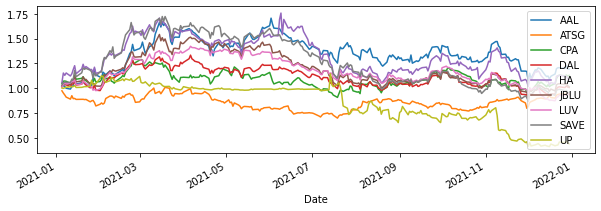

In [ ]:
#「分析期間の開始日を 1 とした倍率」として株価変動のプロット
# plotting stock price changes as a "magnification with the start date of the analysis period as 1".
(df_ratio + 1).cumprod().plot(figsize=(10,3))

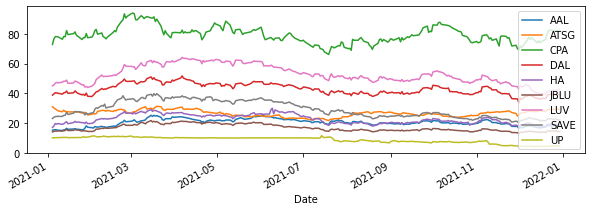

In [ ]:
# 生データ(raw data)に基づく株価変動のプロット
# plotting stock price changes based on raw data
df.plot(figsize=(10,3))